# Load Machine Learning Libraries

In [26]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import pandas as pd
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

**Load Data**

In [18]:
pathToTSV = ('dataset.tsv')

data = pd.read_table(pathToTSV, header=None, names = ['polarity','review'])

data['polarity_num'] = data.polarity.map({'N':0, 'P':1, 'O':2})
X=data.review
y=data.polarity_num
y=y.replace(np.nan,0)
print(data)

     polarity                                 review  polarity_num
0           O                                Kindle.           2.0
1           P                             very fast.           1.0
2           P  Beginner tablet for our year old son.           1.0
3           P                                  Good.           1.0
4           P             Fantastic Tablet for kids.           1.0
...       ...                                    ...           ...
9995        P                     Surprisingly good.           1.0
9996        P                         Great product.           1.0
9997        P                        Great for kids.           1.0
9998        P                           Great Gifts.           1.0
9999        P                          Nice product.           1.0

[10000 rows x 3 columns]


# Data Expolration

**Count Plot**

Text(0.5, 1.0, 'Countplot of polarity_num')

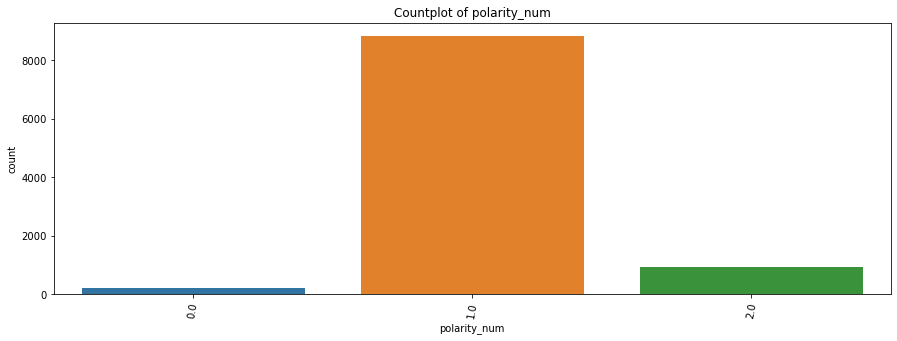

In [19]:
fig, ax  = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='polarity_num', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80);
plt.title('Countplot of polarity_num')

**Pie Chart**

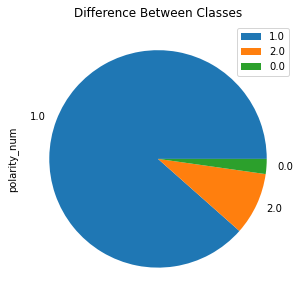

In [20]:
#{'N':0, 'P':1, 'O':2})
data['polarity_num'].value_counts().plot(kind = 'pie', figsize = (5,5))
plt.title('Difference Between Classes')
plt.legend()

**Model Evaluation Function**

In [21]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, plot_confusion_matrix, precision_score, recall_score,r2_score, mean_squared_error, f1_score
from sklearn.model_selection import cross_val_score
def modelEvaluation(predictions, y_test_set, model_name):
    # Print model evaluation to predicted result    
    print("==========",model_name,"==========")
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))    
    print ("\nClassification report : \n", classification_report(y_test_set, predictions))
    print ("\nConfusion Matrix : \n", confusion_matrix(y_test_set, predictions))
    plt.figure(figsize=(10,10))
    sns.heatmap(confusion_matrix(y_test_set, predictions),annot=True, fmt='g',cmap='viridis')
    plt.tight_layout()
    plt.show()
    results = [accuracy_score(y_test_set, predictions), precision_score(y_test_set, predictions, average='macro'),
              recall_score(y_test_set, predictions, average='macro'),f1_score(y_test_set, predictions, average='macro')]
    return results

**Apply CountVectorizer ngram itration and machine learning models**

========== K-Nearest Neighbors ==========

Accuracy on validation set: 0.8862

Classification report : 
               precision    recall  f1-score   support

         0.0       0.33      0.16      0.21        96
         1.0       0.92      0.96      0.94      3529
         2.0       0.53      0.41      0.46       375

    accuracy                           0.89      4000
   macro avg       0.59      0.51      0.54      4000
weighted avg       0.87      0.89      0.88      4000


Confusion Matrix : 
 [[  15   71   10]
 [  27 3375  127]
 [   4  216  155]]


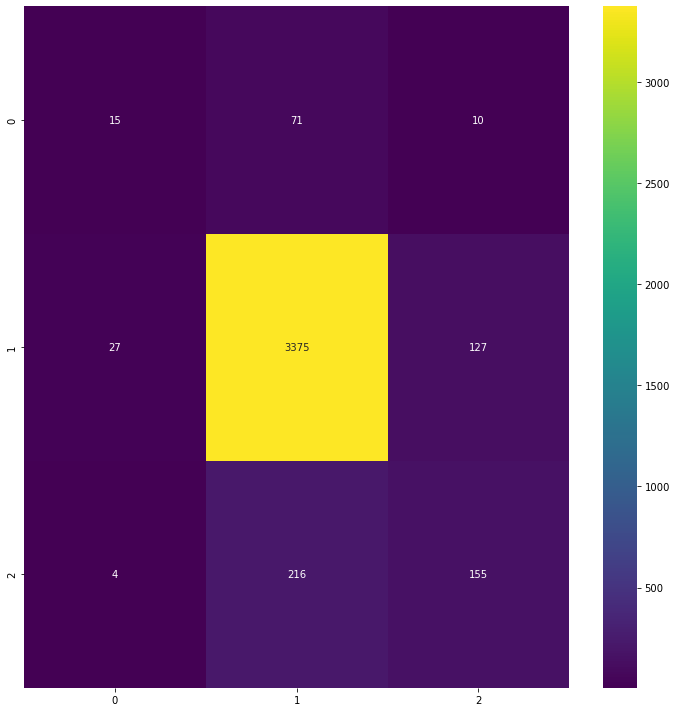

========== Support Vector Machine ==========

Accuracy on validation set: 0.9038

Classification report : 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        96
         1.0       0.91      0.99      0.95      3529
         2.0       0.83      0.28      0.42       375

    accuracy                           0.90      4000
   macro avg       0.58      0.42      0.46      4000
weighted avg       0.88      0.90      0.88      4000


Confusion Matrix : 
 [[   0   93    3]
 [   0 3510   19]
 [   0  270  105]]


C:\Users\Micro Tec\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Micro Tec\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Micro Tec\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


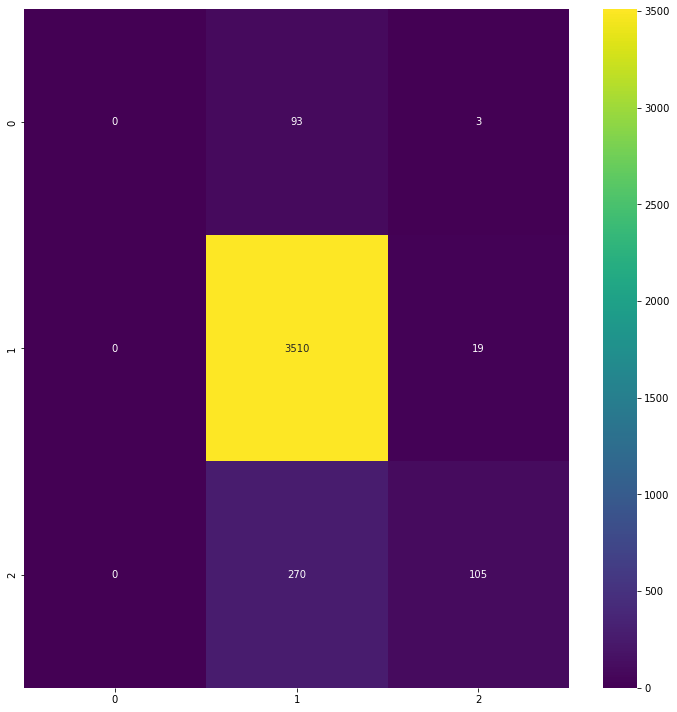

C:\Users\Micro Tec\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========== Random Forest ==========

Accuracy on validation set: 0.8945

Classification report : 
               precision    recall  f1-score   support

         0.0       0.52      0.14      0.21        96
         1.0       0.92      0.97      0.94      3529
         2.0       0.59      0.36      0.45       375

    accuracy                           0.89      4000
   macro avg       0.67      0.49      0.54      4000
weighted avg       0.88      0.89      0.88      4000


Confusion Matrix : 
 [[  13   76    7]
 [  11 3429   89]
 [   1  238  136]]


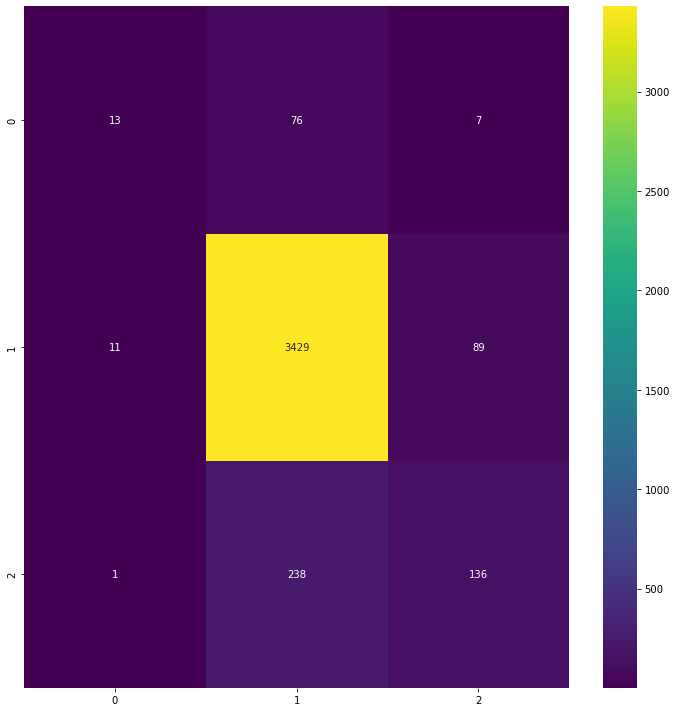

========== GradientBoosting ==========

Accuracy on validation set: 0.9002

Classification report : 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        96
         1.0       0.91      0.99      0.95      3529
         2.0       0.73      0.28      0.41       375

    accuracy                           0.90      4000
   macro avg       0.55      0.42      0.45      4000
weighted avg       0.87      0.90      0.87      4000


Confusion Matrix : 
 [[   0   91    5]
 [   0 3496   33]
 [   0  270  105]]


C:\Users\Micro Tec\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Micro Tec\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Micro Tec\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


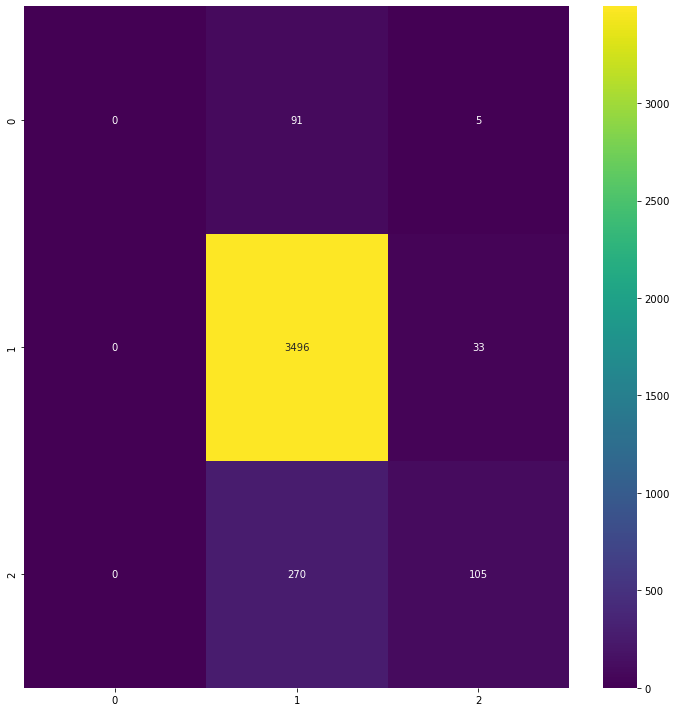

C:\Users\Micro Tec\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Micro Tec\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Micro Tec\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Micro Tec\anaconda3\lib\site-packages\sklearn\m

========== Decision Tree ==========

Accuracy on validation set: 0.9005

Classification report : 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        96
         1.0       0.90      1.00      0.95      3529
         2.0       0.97      0.20      0.33       375

    accuracy                           0.90      4000
   macro avg       0.62      0.40      0.42      4000
weighted avg       0.88      0.90      0.87      4000


Confusion Matrix : 
 [[   0   95    1]
 [   0 3528    1]
 [   0  301   74]]


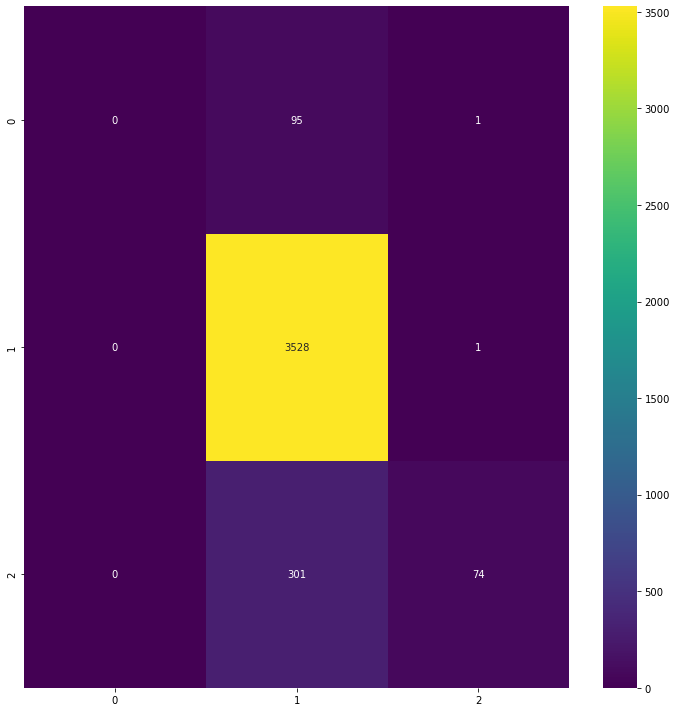

C:\Users\Micro Tec\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
vect = CountVectorizer()

   
X_train_dta,X_test_dta,y_train_dta,y_test_dta = train_test_split(X,y,test_size=0.4, random_state=0)

vect.fit(X_train_dta) 
X_train_mtd = vect.transform(X_train_dta) 
X_test_mtd = vect.transform(X_test_dta) 



knncodeA = KNeighborsClassifier(n_neighbors=3)
knncodeA.fit(X_train_mtd, y_train_dta)
y_knnA_pred = knncodeA.predict(X_test_mtd)
result_Kn = modelEvaluation(y_knnA_pred, y_test_dta, 'K-Nearest Neighbors')



clf_sv=SVC()
clf_sv.fit(X_train_mtd, y_train_dta)
y_pred_sv=clf_sv.predict(X_test_mtd)
result_SV = modelEvaluation(y_pred_sv, y_test_dta, 'Support Vector Machine')



rfcodeA = RandomForestClassifier(n_jobs=2, random_state=0)
rfcodeA.fit(X_train_mtd, y_train_dta)
rforestA_g = rfcodeA.predict(X_test_mtd)
result_rf= modelEvaluation(rforestA_g, y_test_dta, 'Random Forest')


GBC=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
GBC.fit(X_train_mtd, y_train_dta)
y_pred_GBC=GBC.predict(X_test_mtd)
result_gb= modelEvaluation(y_pred_GBC, y_test_dta, 'GradientBoosting')






clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf.fit(X_train_mtd, y_train_dta)
y_pred=clf.predict(X_test_mtd)
result_dt= modelEvaluation(y_pred, y_test_dta, 'Decision Tree')





**Comparsion Betwween Classification Machine Learning Models**

In [33]:
from tabulate import tabulate
# showing all models result
dic = {
    'Metrics':['accuracy','precision','recall','f1-score'],
    'Decision tree' :result_dt,
    'Random Forest' : result_rf,
    'SVC': result_SV,
    'KNN Classifier':result_Kn,
    'Gradient Boosting':result_gb
    
}
metrics_df = pd.DataFrame(dic)

metrics_df = metrics_df.set_index('Metrics')
# displaying the DataFrame
print(tabulate(metrics_df, headers = 'keys', tablefmt = 'psql'))

+-----------+-----------------+-----------------+----------+------------------+---------------------+
| Metrics   |   Decision tree |   Random Forest |      SVC |   KNN Classifier |   Gradient Boosting |
|-----------+-----------------+-----------------+----------+------------------+---------------------|
| accuracy  |        0.9005   |        0.8945   | 0.90375  |         0.88625  |            0.90025  |
| precision |        0.624256 |        0.674106 | 0.577682 |         0.592845 |            0.54689  |
| recall    |        0.399017 |        0.489916 | 0.424872 |         0.508648 |            0.42355  |
| f1-score  |        0.424964 |        0.53535  | 0.455573 |         0.538236 |            0.450687 |
+-----------+-----------------+-----------------+----------+------------------+---------------------+


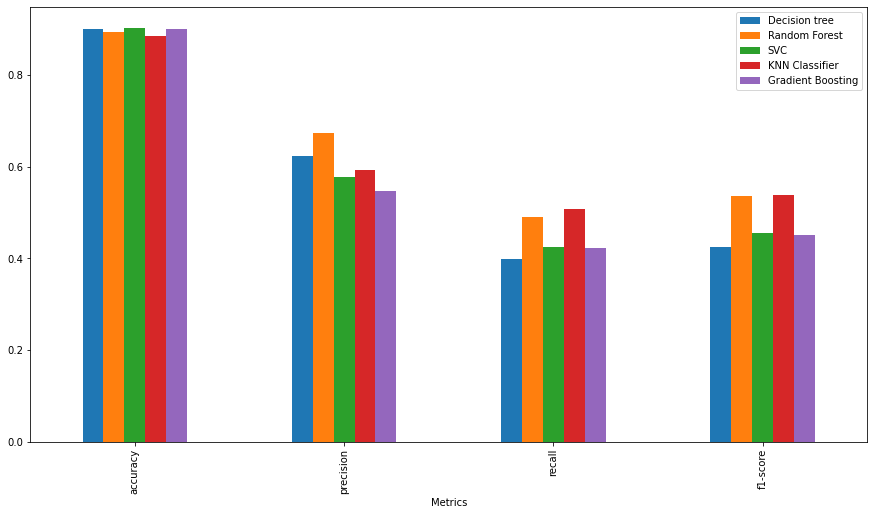

In [34]:
metrics_df.plot(kind='bar', figsize=(15,8))
plt.show()

**Models Accuracay Comparison**

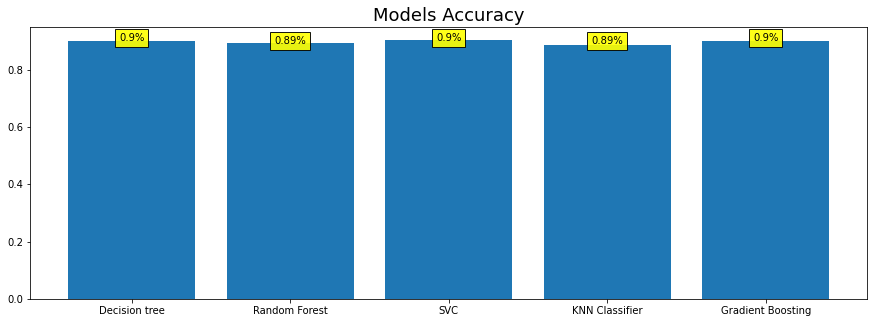

In [35]:
models_acc = metrics_df.iloc[0].tolist()
models_names = metrics_df.columns.tolist()
plt.figure(figsize=(15,5))
plt.bar(models_names,models_acc)
plt.title("Models Accuracy", fontsize=18)

def addLabels(names,acc):
    for i in range(len(names)):
        plt.text(i,round(acc[i],2),f"{round(acc[i],2)}%", ha = 'center', bbox=dict(facecolor='yellow', alpha=0.9))

addLabels(models_names,models_acc)
plt.show()